In [14]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import field
import spatial
import timesteppers
import equations
import equationsBC
import equations3
import equations4

In [15]:
def plot_2D_field(xm, ym, data):
    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(111)
    pcm = ax.pcolormesh(xm, ym, data)
    ax.set_aspect(1)
    fig.colorbar(pcm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

<IPython.core.display.Javascript object>


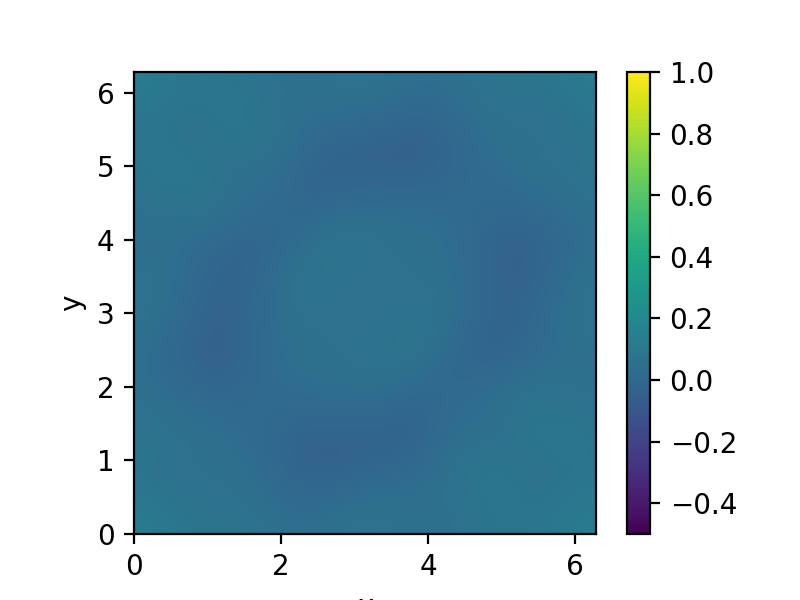

done


In [19]:
resolution=200
grid_x = field.UniformPeriodicGrid(resolution, 2*np.pi)
grid_y = field.UniformPeriodicGrid(resolution, 2*np.pi)
domain = field.Domain((grid_x, grid_y))
x, y = domain.values()

BT = np.sin(x/2)*np.ones_like(y) +2
BT = np.sin(x)*np.sin(y) +2

IC = np.exp( - ( (x-np.pi)**2 + (y-np.pi)**2 )*2 )

#IC += np.exp( - ( (x-np.pi/2)**2 + (y-np.pi/2)**2 )*2 )

h = field.Field(domain)
u = field.Field(domain)
v = field.Field(domain)
H = field.Field(domain)

X = field.FieldSystem([u,v,h])

h.data[:] = IC
u.data[:] = 0*IC 
v.data[:] = 0*IC
H.data[:] = BT

g = 9.81
nu = 0
f = 0.5
b = 0.5

alpha = 0.05

sw = equations.linearSW(X, 2, g, f,b,H)
sw_problem=timesteppers.PredictorCorrector(sw)
dt = alpha*grid_x.dx

xm, ym = domain.plotting_arrays()

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
pcm = ax.pcolormesh(xm, ym, h.data)
pcm.set_clim([-1,1])
ax.set_aspect(1)
fig.colorbar(pcm)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.canvas.draw()
while sw_problem.t < 5 - 1e-5:
    sw_problem.step(dt)
    if sw_problem.iter % 10 == 0:
        pcm.set_array(np.ravel(h.data))
        #pcm.set_clim([0,np.max(h.data)])
        fig.canvas.draw()
print('done')

In [ ]:
resolution=200
grid_x = field.UniformPeriodicGrid(resolution, 2*np.pi)
grid_y = field.UniformPeriodicGrid(resolution, 2*np.pi)
domain = field.Domain((grid_x, grid_y))
x, y = domain.values()

#BT = np.sin(x/2)*np.ones_like(y)
BT = np.sin(x/2)*np.sin(y/2)+3

IC = np.exp( - ( (x-np.pi)**2 + (y-np.pi)**2 )*8 )
# IC += np.exp( - ( (x-10)**2 + (y-18)**2 ) )

h = field.Field(domain)
u = field.Field(domain)
v = field.Field(domain)
H = field.Field(domain)

X = field.FieldSystem([u,v,h])

h.data[:] = IC
u.data[:] = 0*IC 
v.data[:] = 0*IC
H.data[:] = BT

g = 9.81
nu = 0
f = 0
b = 0


alpha = 0.05

sw = equations.SWFull(X, 2, g, f,b,nu,H)
dt = alpha*grid_x.dx

xm, ym = domain.plotting_arrays()

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
pcm = ax.pcolormesh(xm, ym, h.data)
pcm.set_clim([-1,1])
ax.set_aspect(1)
fig.colorbar(pcm)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.canvas.draw()
while sw.t < 2 - 1e-5:
    sw.step(dt)
    if sw.iter % 10 == 0:
        pcm.set_array(np.ravel(h.data))
        #pcm.set_clim([0,np.max(h.data)])
        print(np.max(h.data))
        fig.canvas.draw()
print('done')